In [1]:
import matplotlib.pyplot as plt

import torch

from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"

from diffusion_framework.ddpm_1d import DDPM_1d
from diffusion_framework.nets import ErrorNet

from torch.optim import Adam

/home/sb59938/anaconda3/envs/ddpm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define data
dataset = torch.rand(10000,2)/3 + 0.5 #expert.data
batch_size = 128
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define models
timesteps = 1000
diffusion = DDPM_1d(timesteps)

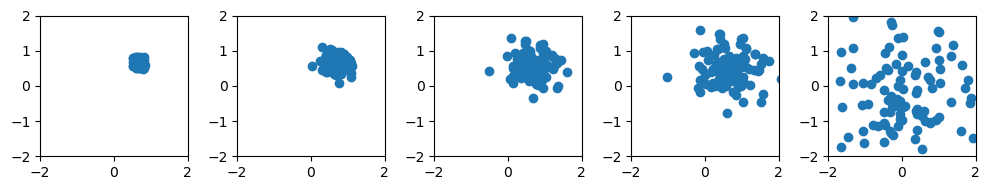

In [3]:
# Visualizing corruption process

x_sample = dataset[:100].unsqueeze(0)
t = torch.tensor([0,50,100, 150, 999])
out = diffusion.q_sample(x_sample, t)
N = 5
fig, ax = plt.subplots(1,5,figsize=(N*2,2))
for i in range(N):
    ax[i].scatter(out[i, :, 0], out[i, :, 1])
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
plt.tight_layout()

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = ErrorNet(2)
model.to(device)

optimizer = Adam(model.parameters(), lr=1e-3)

In [5]:
epochs = 20

for epoch in range(epochs):
    for step, batch in enumerate(dataloader):
      optimizer.zero_grad()

      batch_size = batch.shape[0]
      batch = batch.to(device)

      # Algorithm 1 line 3: sample t uniformally for every example in the batch
      t = torch.randint(0, timesteps, (batch_size,), device=device).long()

      loss = diffusion.p_losses(model, batch, t, loss_type="huber")

      if step % 100 == 0:
        print("Loss:", loss.item())

      loss.backward()
      optimizer.step()


Loss: 0.3934389650821686
Loss: 0.38763362169265747
Loss: 0.2591437101364136
Loss: 0.25763046741485596
Loss: 0.2569745182991028
Loss: 0.23583751916885376
Loss: 0.26319175958633423
Loss: 0.2719419598579407
Loss: 0.21116496622562408
Loss: 0.26111793518066406
Loss: 0.2779815196990967
Loss: 0.23952853679656982
Loss: 0.11235128343105316
Loss: 0.11060091853141785
Loss: 0.07705333083868027
Loss: 0.07817928493022919
Loss: 0.08901609480381012
Loss: 0.07844488322734833
Loss: 0.07473574578762054
Loss: 0.06752434372901917


sampling loop time step: 100%|██████████| 1000/1000 [00:00<00:00, 1691.50it/s]


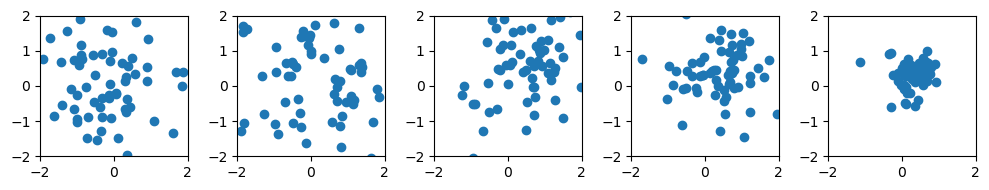

In [6]:
samples = diffusion.sample(model, image_size=2, batch_size=64)
time = torch.tensor([0,100,500, 750, 999])

N = 5
fig, ax = plt.subplots(1,5,figsize=(N*2,2))
for i, t in enumerate(time):
    ax[i].scatter(samples[t][:, 0], samples[t][:, 1])
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
plt.tight_layout()